In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,GRU,Bidirectional

with open('speaker_data.json', "r") as file:
    data = json.load(file)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) 

In [2]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5)

model = Sequential()


model.add(GRU(128, input_shape=(X_train.shape[1],X_train.shape[2]),return_sequences=True))
model.add(BatchNormalization())
model.add(Bidirectional(GRU(128)))

model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(10, activation = "softmax"))

In [3]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 128)            54912     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 128)            512       
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               198144    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 274,826
Trainable params: 274,570
Non-trainable params: 256
________________________________________________

In [5]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=30,
                    verbose=2,
                    callbacks=[rlrop])

Epoch 1/30
2110/2110 - 36s - loss: 0.3574 - accuracy: 0.8834 - val_loss: 0.1471 - val_accuracy: 0.9505 - lr: 1.0000e-04
Epoch 2/30
2110/2110 - 33s - loss: 0.1437 - accuracy: 0.9494 - val_loss: 0.1209 - val_accuracy: 0.9591 - lr: 1.0000e-04
Epoch 3/30
2110/2110 - 43s - loss: 0.1126 - accuracy: 0.9607 - val_loss: 0.1055 - val_accuracy: 0.9631 - lr: 1.0000e-04
Epoch 4/30
2110/2110 - 35s - loss: 0.0958 - accuracy: 0.9667 - val_loss: 0.1025 - val_accuracy: 0.9645 - lr: 1.0000e-04
Epoch 5/30
2110/2110 - 33s - loss: 0.0835 - accuracy: 0.9711 - val_loss: 0.0912 - val_accuracy: 0.9687 - lr: 1.0000e-04
Epoch 6/30
2110/2110 - 35s - loss: 0.0730 - accuracy: 0.9748 - val_loss: 0.0861 - val_accuracy: 0.9707 - lr: 1.0000e-04
Epoch 7/30
2110/2110 - 36s - loss: 0.0672 - accuracy: 0.9766 - val_loss: 0.0860 - val_accuracy: 0.9703 - lr: 1.0000e-04
Epoch 8/30
2110/2110 - 35s - loss: 0.0593 - accuracy: 0.9795 - val_loss: 0.0800 - val_accuracy: 0.9725 - lr: 1.0000e-04
Epoch 9/30
2110/2110 - 37s - loss: 0.054

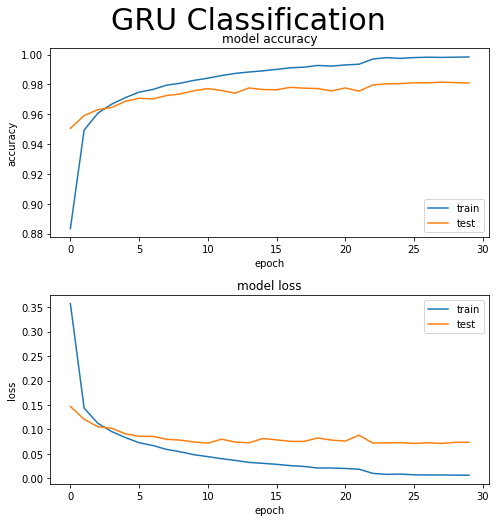

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))


plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('GRU Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import classification_report
labelNames = ['Jens_Stoltenberg','Margaret_Thatcher','Julia_Gillard','Nelson_Mandela','Benjamin_Netanyahu']
predictions = model.predict(X_test, batch_size=32)

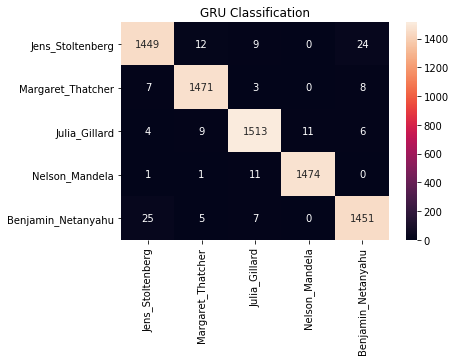

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1))
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('GRU Classification');

In [10]:
98.09

98.09